# March Madness Data Analysis Log

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

home = str(Path.home())

RPLIB_DATA_PREFIX = os.environ.get("RPLIB_DATA_PREFIX")

if RPLIB_DATA_PREFIX is None: # Set default
    RPLIB_DATA_PREFIX=f'{home}/RPLib/data'
    
try:
    import pyrankability as pyrankability
    import pyrplib as pyrplib
except:
    print('Looking for packages in home directory')
    sys.path.insert(0,f"{home}/ranking_toolbox") # Add the home directory relevant paths to the PYTHONPATH
    sys.path.insert(0,f"{home}/RPLib") # Add the home directory relevant paths to the PYTHONPATH
    import pyrankability
    import pyrplib

import pandas as pd

Looking for packages in home directory


In [3]:
config = pyrplib.config.Config(RPLIB_DATA_PREFIX)
config

In [4]:
datasets_df = config.datasets_df
processed_datasets_df = config.processed_datasets_df

In [5]:
datasets_df.set_index('Dataset ID',inplace=True)
datasets_df.head()

,Dataset Name,Description,Type,Loader,Download links
Dataset ID,,,,,
1,March Madness 2002,"2002 regular season games, list of teams, and ...",Games,marchmadness.base.Unprocessed,[https://raw.githubusercontent.com/IGARDS/marc...
2,March Madness 2003,"2003 regular season games, list of teams, and ...",Games,https://github.com/IGARDS/RPLib/blob/main/pipe...,[https://raw.githubusercontent.com/IGARDS/marc...
3,March Madness 2004,"2004 regular season games, list of teams, and ...",Games,https://github.com/IGARDS/RPLib/blob/main/pipe...,[https://raw.githubusercontent.com/IGARDS/marc...
4,March Madness 2005,"2005 regular season games, list of teams, and ...",Games,https://github.com/IGARDS/RPLib/blob/main/pipe...,[https://raw.githubusercontent.com/IGARDS/marc...
5,March Madness 2006,"2006 regular season games, list of teams, and ...",Games,https://github.com/IGARDS/RPLib/blob/main/pipe...,[https://raw.githubusercontent.com/IGARDS/marc...


In [6]:
processed_datasets_df.set_index('Dataset ID',inplace=True)
processed_datasets_df.head()

,Source Dataset ID,Command,Link,Last Processed Datetime
Dataset ID,,,,
1,1,transformers.direct(transformers.count(...)),/marchmadness/1_D.json,NaN


In [7]:
import importlib
from datetime import datetime

for dataset_id in processed_datasets_df.index:
    dataset = processed_datasets_df.loc[dataset_id]
    source_dataset_id = dataset['Source Dataset ID']
    links = datasets_df.loc[source_dataset_id,'Download links']
    loader = datasets_df.loc[source_dataset_id,'Loader']
    command = dataset['Command']
    if "base" in loader: # migration check
        loader_lib = ".".join(loader.split(".")[:-1])
        cls_str = loader.split(".")[-1]
        load_lib = importlib.import_module(f"pyrplib.{loader_lib}")
        cls = getattr(load_lib, cls_str)
        unprocessed = cls(source_dataset_id,links).load()
        funcs = command.split("...")[0].split("(")[:-1]
        data = unprocessed.data()
        for func in funcs[::-1]:
            if func == "transformers.count":
                data = pyrplib.transformers.count(*data)
            elif func == "transformers.direct":
                data = pyrplib.transformers.direct(*data)
        # datetime object containing current date and time
        now = datetime.now()

        # dd/mm/YY H:M:S
        dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
        print("date and time =", dt_string)
        
        data.source_dataset_id = source_dataset_id
        data.dataset_id = dataset_id
        data.command = command
        
        processed_datasets_df.loc[dataset_id,'Last Processed Datetime'] = dt_string

        result_path = f"{dataset_id}_{data.short_type}.json"
        print('Writing to',result_path)
        open(result_path,'w').write(data.to_json())

date and time = 21/12/2021 16:17:49
Writing to 1_D.json


In [8]:
config.save_processed_datasets()

In [6]:
dataset_id = df_games.index[0]

unprocessed = load_lib.Unprocessed(dataset_id,links)
unprocessed.load()

,team1_name,team1_score,team1_H_A_N,team2_name,team2_score,team2_H_A_N
2237,Arizona,71,0,Maryland,67,0
3937,Florida,72,0,Temple,64,0
1285,Arizona,75,0,Florida,71,0
3940,Maryland,82,0,Temple,74,0
2204,Syracuse,78,1,Manhattan,58,1
...,...,...,...,...,...,...
1950,American_Univ,66,0,Lafayette,58,0
2939,IUPUI,90,0,Oakland,84,0
2410,Kansas,95,-1,Missouri,92,-1
3704,Missouri_KC,70,0,Southern_Utah,57,0


In [ ]:
pyrplib.marchmadness.base.UnprocessedMarchMadness

## D Matrix Creation

In [5]:
for ix in df_games.index:
    !python ../../pipelines/create_D_from_games.py {ix} {ix}

load_D_from_games
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2002teams.txt
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2002games.txt
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2002MadnessTeams.txt
team2           Alabama  Alcorn_St  Arizona  ...  Wisconsin  Wyoming  Xavier
team1                                        ...                            
Alabama             NaN        NaN      NaN  ...        NaN      NaN     NaN
Alcorn_St           NaN        NaN      NaN  ...        NaN      NaN     NaN
Arizona             NaN        NaN      NaN  ...        NaN      NaN     NaN
Boston_College      NaN        NaN      NaN  ...        NaN      NaN     NaN
Boston_Univ         NaN        NaN      NaN  ...        NaN      NaN     NaN
...                 ...        ...      ...  ...        ...      ...     ...
Wake_Forest         NaN        NaN      0.0  ...        NaN      NaN     NaN
Winthrop            NaN 

## Manual Update to dataset_tool_Ds.tsv

Now you must manually make changes to dataset_tool_Ds.tsv and push.

## LOP Card Creation

### Dataset IDs

In [20]:
for ix in df_games.index:
    print(ix)
    !python ../../pipelines/create_lop_card.py {ix} {ix}

1
Link    https://raw.githubusercontent.com/IGARDS/RPLib/master/data/marchmadness/1_D.json
Name: 1, dtype: object
/opt/tljh/user/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:18: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
(65, 65)
Academic license - for non-commercial use only - expires 2022-09-05
Using license file /home/jupyter-pander14/gurobi.lic
Found multiple solutions for https://raw.githubusercontent.com/IGARDS/RPLib/master/data/marchmadness/1_D.json
Writing to 1_lop_card.json
2
Link    https://raw.githubusercontent.com/IGARDS/RPLib/master/data/marchmadness/2_D.json
Name: 2, dtype: object
/opt/tljh/user/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:18: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
(65, 65)
Acad

In [6]:
for ix in df_games.index:
    print(ix)
    !python ../../pipelines/create_hillside_card.py {ix} {ix}

1
Dataframes Available
Ds_df
datasets_df
lop_cards_df
Link    /home/jupyter-pander14/RPLib/data//marchmadness/1_D.json
Name: 1, dtype: object
(65, 65)
Academic license - for non-commercial use only - expires 2022-09-05
Using license file /home/jupyter-pander14/gurobi.lic
Found multiple solutions for /home/jupyter-pander14/RPLib/data//marchmadness/1_D.json
Writing to 1_hillside_card.json
2
Dataframes Available
Ds_df
datasets_df
lop_cards_df
Link    /home/jupyter-pander14/RPLib/data//marchmadness/2_D.json
Name: 2, dtype: object
(65, 65)
Academic license - for non-commercial use only - expires 2022-09-05
Using license file /home/jupyter-pander14/gurobi.lic
Found multiple solutions for /home/jupyter-pander14/RPLib/data//marchmadness/2_D.json
Writing to 2_hillside_card.json
3
Dataframes Available
Ds_df
datasets_df
lop_cards_df
Link    /home/jupyter-pander14/RPLib/data//marchmadness/3_D.json
Name: 3, dtype: object
(65, 65)
Academic license - for non-commercial use only - expires 2022-09-05
U

## Show how you can import a LOP Card

In [21]:
import sys
from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
sys.path.insert(0,home)

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import RPLib.pyrplib as pyrplib

In [24]:
lop_card = pyrplib.base.LOPCard.from_json("./1_lop_card.json")

In [25]:
lop_card._instance

D                    {'Alabama': {'Alabama': 0.0, 'Alcorn_St': 0.0,...
obj                                                              196.0
solutions            [[59, 58, 54, 45, 42, 56, 62, 49, 47, 46, 55, ...
max_tau_solutions                                                 None
centroid_x           [[0.0, 0.1104604688, 0.5539557967, 0.115475308...
outlier_solution     [40, 53, 22, 2, 38, 61, 5, 12, 26, 20, 50, 51,...
dataset_id                                                           1
source_dataset_id                                                    1
centroid_solution    [17, 1, 60, 29, 25, 12, 61, 40, 53, 0, 15, 24,...
dtype: object

In [26]:
pd.DataFrame(lop_card.solutions)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,59,58,54,45,42,56,62,49,47,46,...,29,60,22,15,0,53,40,1,17,12
1,40,53,22,2,38,61,5,12,26,20,...,59,10,7,13,18,19,35,58,11,41
2,17,1,60,29,25,12,61,40,53,0,...,6,5,55,49,59,46,62,56,42,45
3,59,58,54,49,47,45,42,56,62,46,...,15,12,5,1,2,0,22,53,40,17


## Plotting examples

In [27]:
import ranking_toolbox.pyrankability as pyrankability

In [28]:
D = pd.DataFrame(lop_card.D)

In [29]:
x=pd.DataFrame(lop_card.centroid_x,index=D.index,columns=D.columns)
g,scores,ordered_xstar=pyrankability.plot.show_single_xstar(x)

In [30]:
g

alt.Chart(...)

In [31]:
lop_card._instance

D                    {'Alabama': {'Alabama': 0.0, 'Alcorn_St': 0.0,...
obj                                                              196.0
solutions            [[59, 58, 54, 45, 42, 56, 62, 49, 47, 46, 55, ...
max_tau_solutions                                                 None
centroid_x           [[0.0, 0.1104604688, 0.5539557967, 0.115475308...
outlier_solution     [40, 53, 22, 2, 38, 61, 5, 12, 26, 20, 50, 51,...
dataset_id                                                           1
source_dataset_id                                                    1
centroid_solution    [17, 1, 60, 29, 25, 12, 61, 40, 53, 0, 15, 24,...
dtype: object

In [35]:
D.index[lop_card.outlier_solution]

Index(['Oregon', 'UCLA', 'Kansas', 'Arizona', 'Oklahoma', 'Wisconsin',
       'California', 'Duke', 'Maryland', 'Illinois', 'Texas', 'Texas_Tech',
       'Missouri', 'Alabama', 'USC', 'Wyoming', 'Connecticut', 'Utah',
       'San_Diego_St', 'Hawaii', 'Georgia', 'Kentucky', 'Oklahoma_St',
       'Cincinnati', 'Xavier', 'Winthrop', 'Marquette', 'Mississippi',
       'Notre_Dame', 'Pittsburgh', 'Gonzaga', 'S_Illinois', 'Santa_Barbara',
       'St_John's', 'Stanford', 'Tulsa', 'Valparaiso', 'Alcorn_St',
       'Central_Conn', 'Florida', 'Michigan_St', 'Ohio_St', 'Boston_College',
       'Miami_FL', 'Boston_Univ', 'Indiana', 'McNeese_St', 'Mississippi_St',
       'Kent', 'Montana', 'Murray_St', 'Pepperdine', 'Siena', 'UNC_Wilmington',
       'Wake_Forest', 'Creighton', 'Charlotte', 'FL_Atlantic', 'Holy_Cross',
       'IL_Chicago', 'NC_State', 'W_Kentucky', 'Davidson', 'Penn'],
      dtype='object')

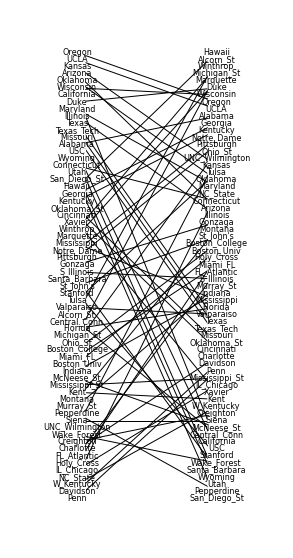

In [40]:
outlier_solution = pd.Series(lop_card.outlier_solution,index=D.index[lop_card.outlier_solution],name="Farthest from Centroid")
centroid_solution = pd.Series(lop_card.centroid_solution,index=D.index[lop_card.centroid_solution],name="Closest to Centroid")
pyrankability.plot.spider3(outlier_solution,centroid_solution)
print()

## Colley

In [54]:
for ix in df_games.index:
    !python ../../pipelines/create_colley_matrices_from_games.py {ix} {ix}

load_colley_matrices_from_games
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2002teams.txt
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2002games.txt
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2002MadnessTeams.txt
Writing to 1_colley_matrices.json
load_colley_matrices_from_games
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2003teams.txt
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2003games.txt
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2003MadnessTeams.txt
Writing to 2_colley_matrices.json
load_colley_matrices_from_games
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2004teams.txt
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2004games.txt
https://raw.githubusercontent.com/IGARDS/marchmadness_study/master/data/2004MadnessTeams.txt
Writing to 3_colley_matrices.json
load_co

### Example loading of colley matrices and processing

In [57]:
colley_matrices = pyrplib.base.MatricesInfo.from_json('./1_colley_matrices.json')
M = pd.DataFrame(colley_matrices.matrix)
b = pd.Series(colley_matrices.b)

In [58]:
M

,Air_Force,Akron,Alabama,Alabama_A&M,Alabama_St,Albany_NY,Alcorn_St,American_Univ,Appalachian_St,Arizona,...,Wichita_St,William_&_Mary,Winthrop,Wisconsin,Wofford,Wright_St,Wyoming,Xavier,Yale,Youngstown_St
Air_Force,29.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,NaN,0.0,-2.0,0.0,-1.0,NaN
Akron,0.0,30.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,...,-1.0,0.0,0.0,-1.0,NaN,0.0,NaN,0.0,NaN,0.0
Alabama,0.0,NaN,32.0,-1.0,0.0,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN
Alabama_A&M,NaN,NaN,-1.0,27.0,-2.0,NaN,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0
Alabama_St,NaN,0.0,0.0,-2.0,29.0,NaN,-2.0,NaN,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wright_St,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,30.0,0.0,0.0,NaN,-2.0
Wyoming,-2.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,28.0,NaN,0.0,0.0
Xavier,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,-1.0,0.0,NaN,0.0,NaN,29.0,0.0,0.0
Yale,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,29.0,NaN


In [59]:
b

Air_Force        -3.5
Akron            -5.0
Alabama          10.0
Alabama_A&M       4.5
Alabama_St        3.5
                 ... 
Wright_St         4.0
Wyoming           7.0
Xavier            9.5
Yale              6.5
Youngstown_St    -8.5
Length: 327, dtype: float64

In [61]:
ranking, r, perm = pyrankability.rank.ranking_from_matrices(M.fillna(0),b.fillna(0))

In [62]:
ranking

Air_Force        211
Akron            256
Alabama            6
Alabama_A&M      197
Alabama_St       214
                ... 
Wright_St        127
Wyoming           44
Xavier            22
Yale             109
Youngstown_St    306
Length: 327, dtype: int64

In [63]:
ranking[perm]

Kansas              1
Maryland            2
Duke                3
Cincinnati          4
Oklahoma            5
                 ... 
Chicago_St        323
Ark_Pine_Bluff    324
Liberty           325
Mt_St_Mary's      326
Morgan_St         327
Length: 327, dtype: int64

In [65]:
r.sort_values(ascending=False)

Kansas            1.048560
Maryland          1.028899
Duke              1.027267
Cincinnati        0.998952
Oklahoma          0.971128
                    ...   
Chicago_St        0.028644
Ark_Pine_Bluff    0.021072
Liberty           0.020625
Mt_St_Mary's      0.015244
Morgan_St         0.007566
Length: 327, dtype: float64